In [1]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv("Data/최종_데이터.csv", encoding="cp949")

# 날짜형으로 변환
df["기준년월"] = pd.to_datetime(df["기준년월"], format="%Y%m")

df = df[["기준년월", "여신한도금액", "여신_운전자금대출잔액", "여신_시설자금대출잔액", "여신_운전자금대출좌수", "여신_시설자금대출좌수"]]
df

,기준년월,여신한도금액,여신_운전자금대출잔액,여신_시설자금대출잔액,여신_운전자금대출좌수,여신_시설자금대출좌수
0,2024-12-01,0.0,70.0,0.0,1개,0개
1,2024-12-01,0.0,1.2,0.0,1개,0개
2,2024-12-01,680.0,430.0,0.0,1개,0개
3,2024-12-01,0.0,3400.0,0.0,1개,0개
4,2024-12-01,170.0,0.0,0.0,1개,0개
...,...,...,...,...,...,...
347294,2022-03-01,100.0,78.0,0.0,1개,0개
347295,2022-03-01,0.0,20.0,0.0,1개,0개
347296,2022-03-01,300.0,240.0,0.0,50개 초과,0개
347297,2022-03-01,0.0,0.0,1100.0,0개,2개초과 5개이하


2022년 12월부터 부동산 대출 규제 정상화

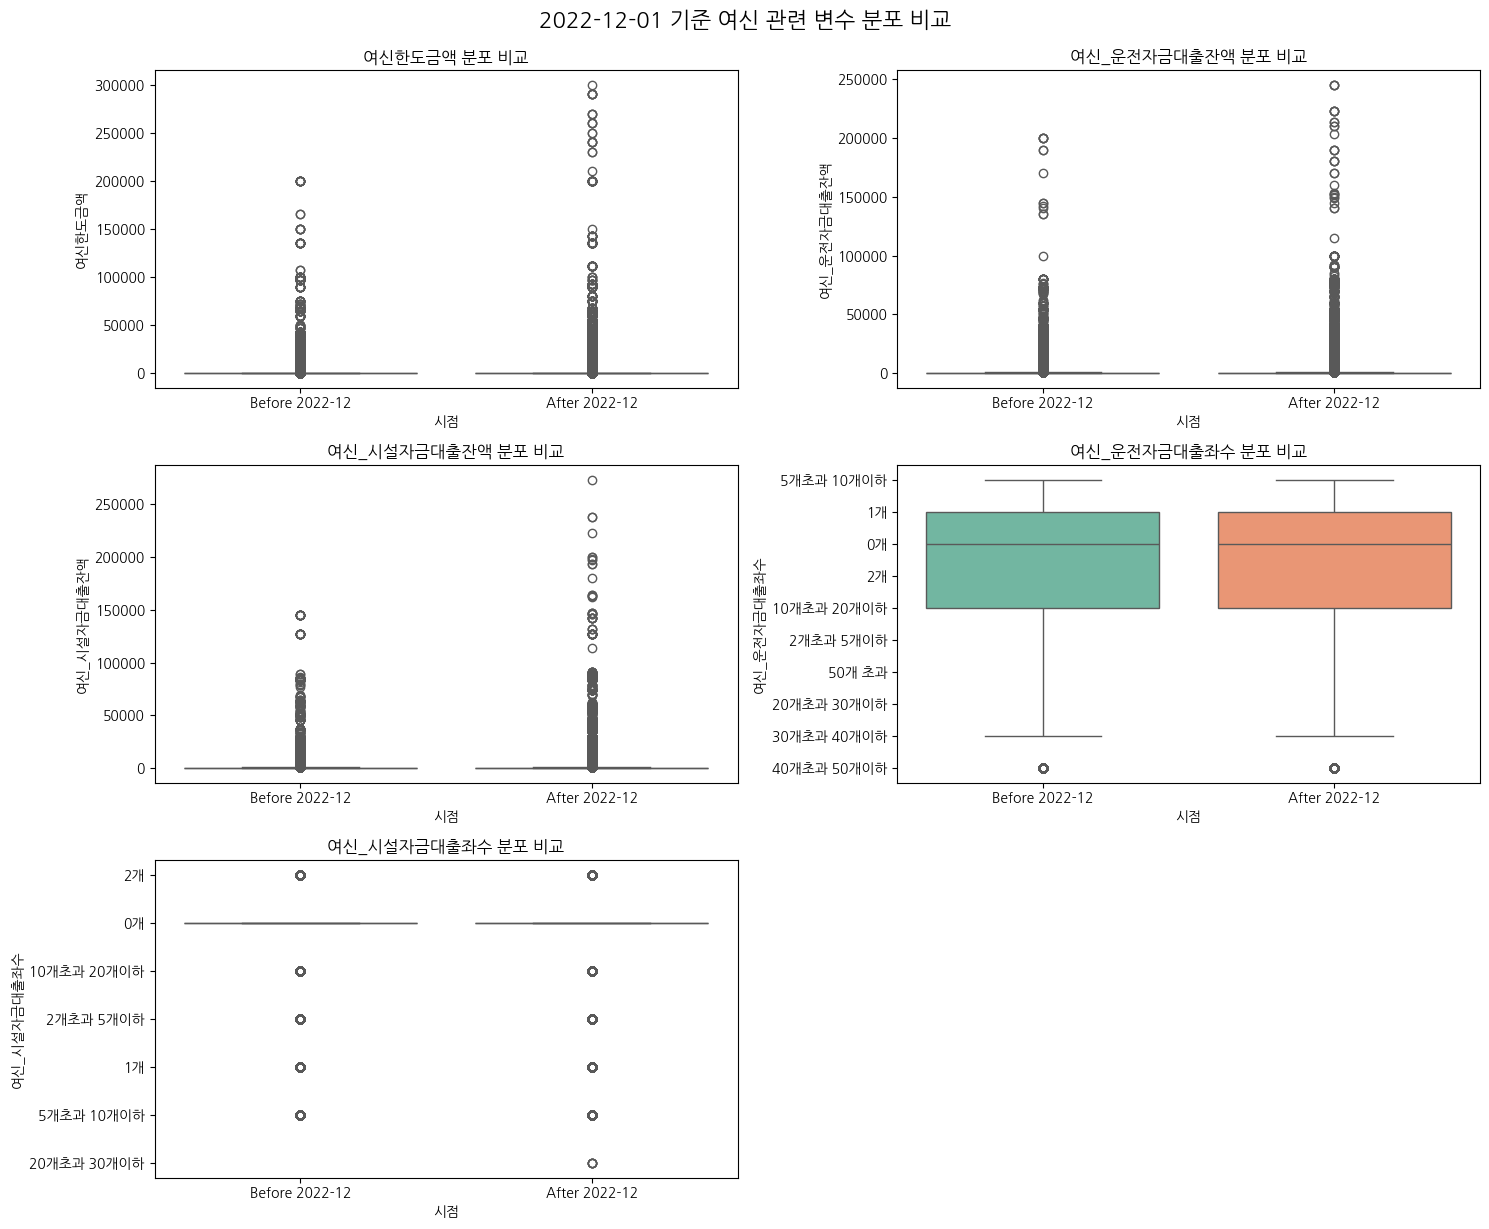

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 기준년월 날짜형으로 변환
df["기준년월"] = pd.to_datetime(df["기준년월"])

# 기준일 기준으로 두 시점 나누기
before_df = df[df["기준년월"] < "2022-12-01"]
after_df = df[df["기준년월"] >= "2022-12-01"]

# 분석 대상 변수 목록
cols = ["여신한도금액", "여신_운전자금대출잔액", "여신_시설자금대출잔액", "여신_운전자금대출좌수", "여신_시설자금대출좌수"]

# 시각화: boxplot으로 전후 분포 비교
plt.figure(figsize=(15, 12))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=pd.concat([
        before_df[[col]].assign(시점="Before 2022-12"),
        after_df[[col]].assign(시점="After 2022-12")
    ]), x="시점", y=col, palette="Set2")
    plt.title(f"{col} 분포 비교")
    plt.tight_layout()

plt.suptitle("2022-12-01 기준 여신 관련 변수 분포 비교", fontsize=16, y=1.02)
plt.show()

-----

In [2]:
import pandas as pd
import numpy as np

# 데이터 불러오기
df = pd.read_csv("Data/최종_데이터.csv", encoding="cp949")

# 날짜형으로 변환
df["기준년월"] = pd.to_datetime(df["기준년월"], format="%Y%m")
df

,기준년월,업종_대분류,업종_중분류,사업장_시도,사업장_시군구,법인_고객등급,전담고객여부,요구불예금잔액,거치식예금잔액,적립식예금잔액,...,여신_시설자금대출좌수,신용카드개수,외환_수출실적거래건수,외환_수입실적거래건수,창구거래건수,인터넷뱅킹거래건수,스마트뱅킹거래건수,폰뱅킹거래건수,ATM거래건수,자동이체거래건수
0,2024-12-01,건설업,종합 건설업,대구광역시,서구,일반,N,0.16,0.0,0.0,...,0개,10개초과 20개이하,0건,0건,0건,0건,2건초과 5건이하,0건,0건,10건초과 20건이하
1,2024-12-01,건설업,종합 건설업,대구광역시,서구,일반,N,0.03,0.0,0.0,...,0개,0개,0건,0건,0건,0건,0건,0건,0건,0건
2,2024-12-01,건설업,종합 건설업,대전광역시,서구,우수,N,0.24,0.0,0.0,...,0개,5개초과 10개이하,0건,0건,0건,50건 초과,0건,0건,0건,20건초과 30건이하
3,2024-12-01,건설업,종합 건설업,대구광역시,서구,우수,Y,180.00,0.0,0.0,...,0개,0개,0건,0건,2건초과 5건이하,20건초과 30건이하,0건,0건,0건,5건초과 10건이하
4,2024-12-01,건설업,종합 건설업,대구광역시,서구,우수,Y,41.00,0.0,0.0,...,0개,5개초과 10개이하,0건,0건,1건,10건초과 20건이하,0건,0건,0건,20건초과 30건이하
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347294,2022-03-01,제조업,금속가공제품 제조업; 기계 및 가구 제외,대구광역시,북구,일반,N,0.02,0.0,0.0,...,0개,0개,0건,0건,0건,1건,0건,0건,2건,0건
347295,2022-03-01,정보통신업,"컴퓨터 프로그래밍, 시스템 통합 및 관리업",대구광역시,중구,일반,N,0.01,0.0,0.0,...,0개,0개,0건,0건,2건초과 5건이하,0건,0건,0건,2건,1건
347296,2022-03-01,도매 및 소매업,소매업; 자동차 제외,경상남도,양산시,일반,Y,11.00,0.0,0.0,...,0개,2개,0건,0건,0건,40건초과 50건이하,0건,0건,0건,30건초과 40건이하
347297,2022-03-01,부동산업,부동산업,경상북도,경주시,일반,Y,21.00,0.0,0.0,...,2개초과 5개이하,0개,0건,0건,2건,2건초과 5건이하,0건,0건,0건,0건


<Figure size 1600x1000 with 0 Axes>

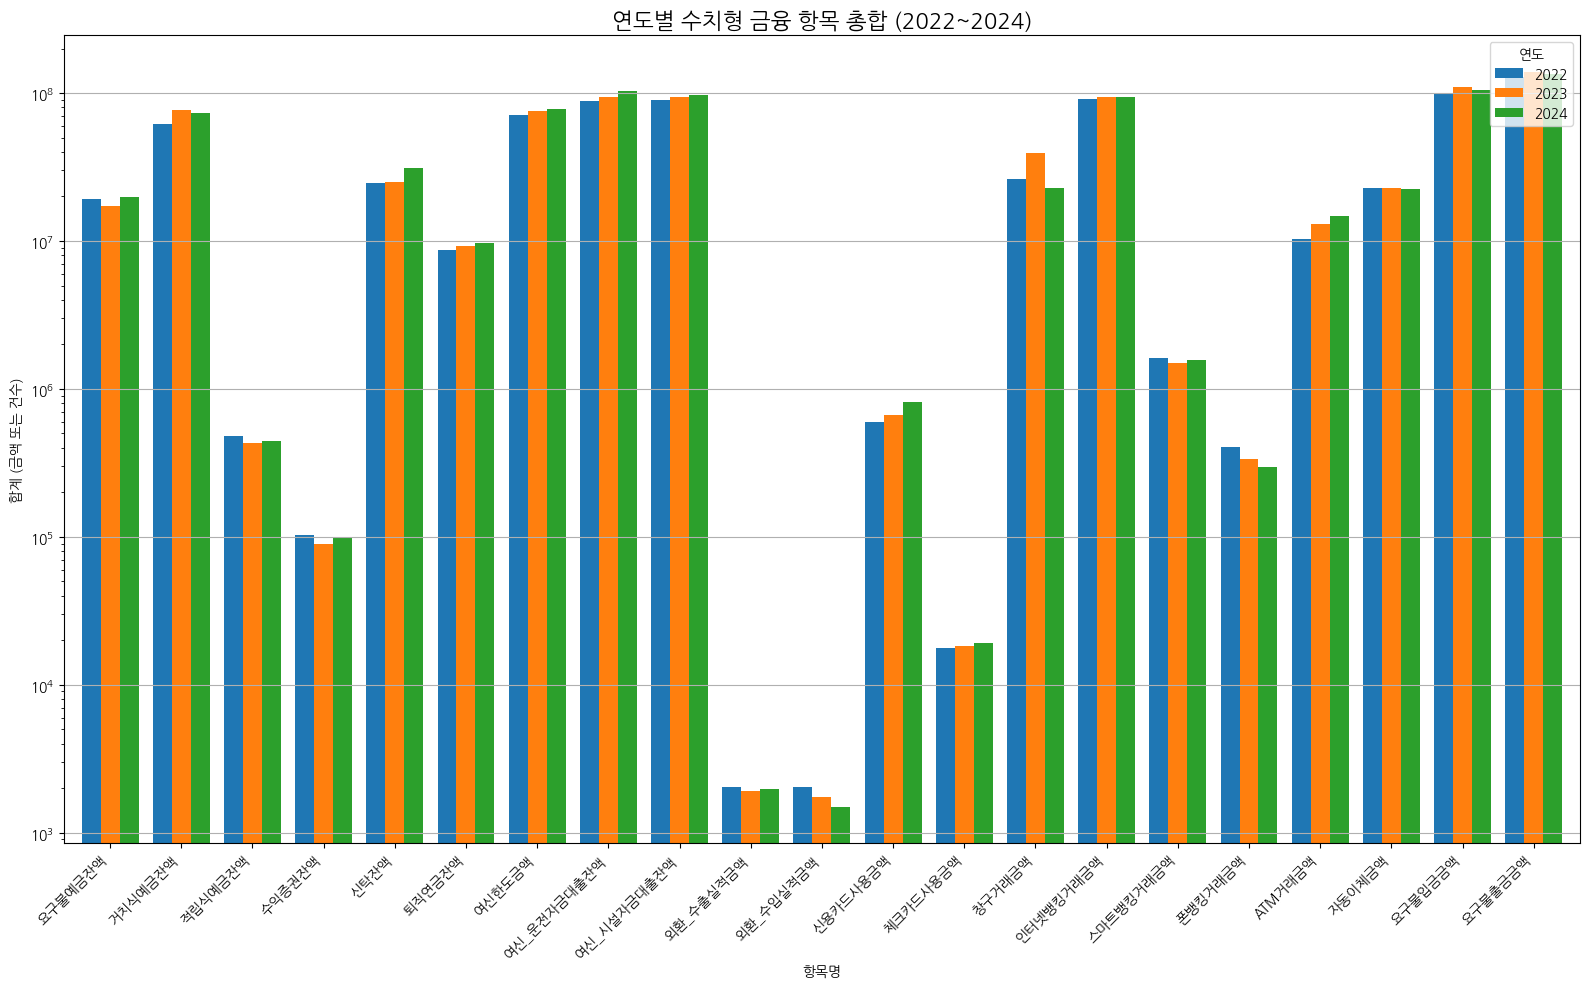

In [7]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 1. 기준년월에서 연도 추출
df["연도"] = df["기준년월"].dt.year
df["월"] = df["기준년월"].dt.month

# 2. 모든 수치형(float64) 열만 선택
float_cols = df.select_dtypes(include="float").columns.tolist()

# 3. 연도별 합계 계산 (transpose해서 항목별로 시각화 가능하게)
yearly_sum = df.groupby("연도")[float_cols].sum().T

# 4. 시각화
plt.figure(figsize=(16, 10))
yearly_sum.plot(kind="bar", figsize=(16, 10), width=0.8)

plt.title("연도별 수치형 금융 항목 총합 (2022~2024)", fontsize=16)
plt.xlabel("항목명")
plt.ylabel("합계 (금액 또는 건수)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.yscale("log")
plt.legend(title="연도", loc="upper right")
plt.tight_layout()
plt.show()

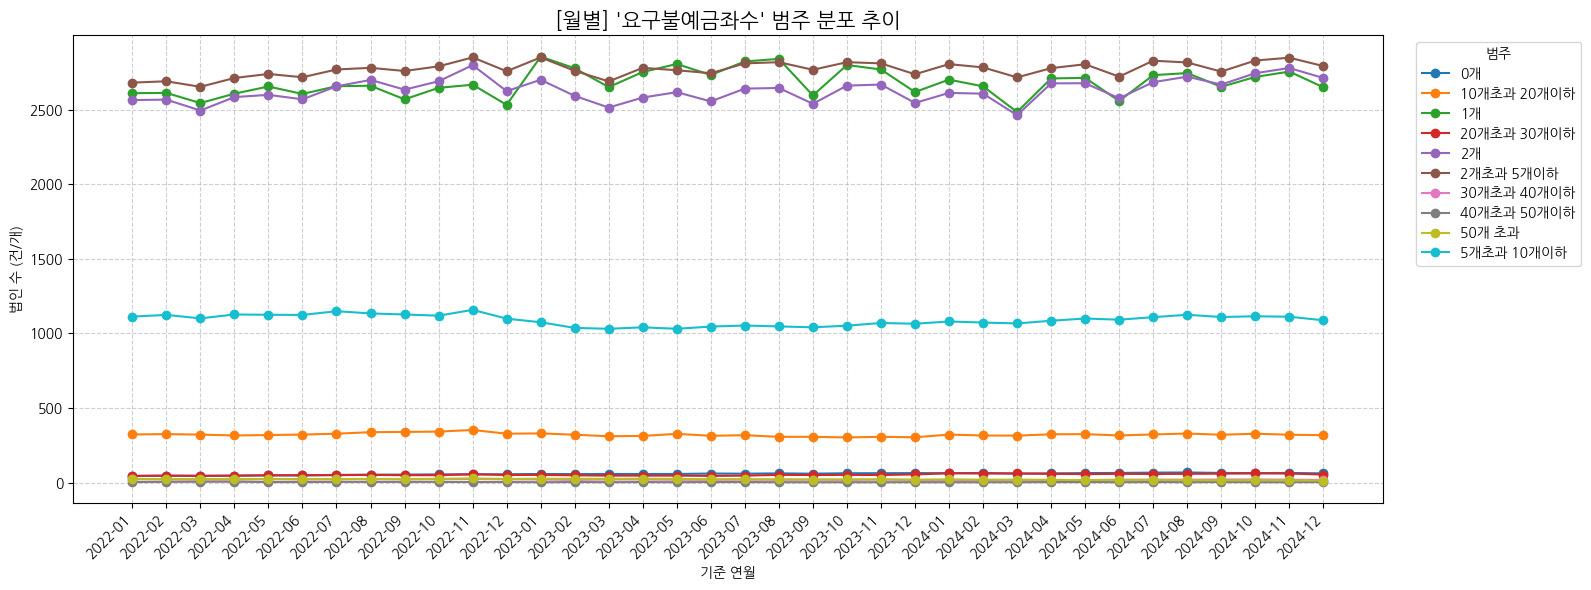

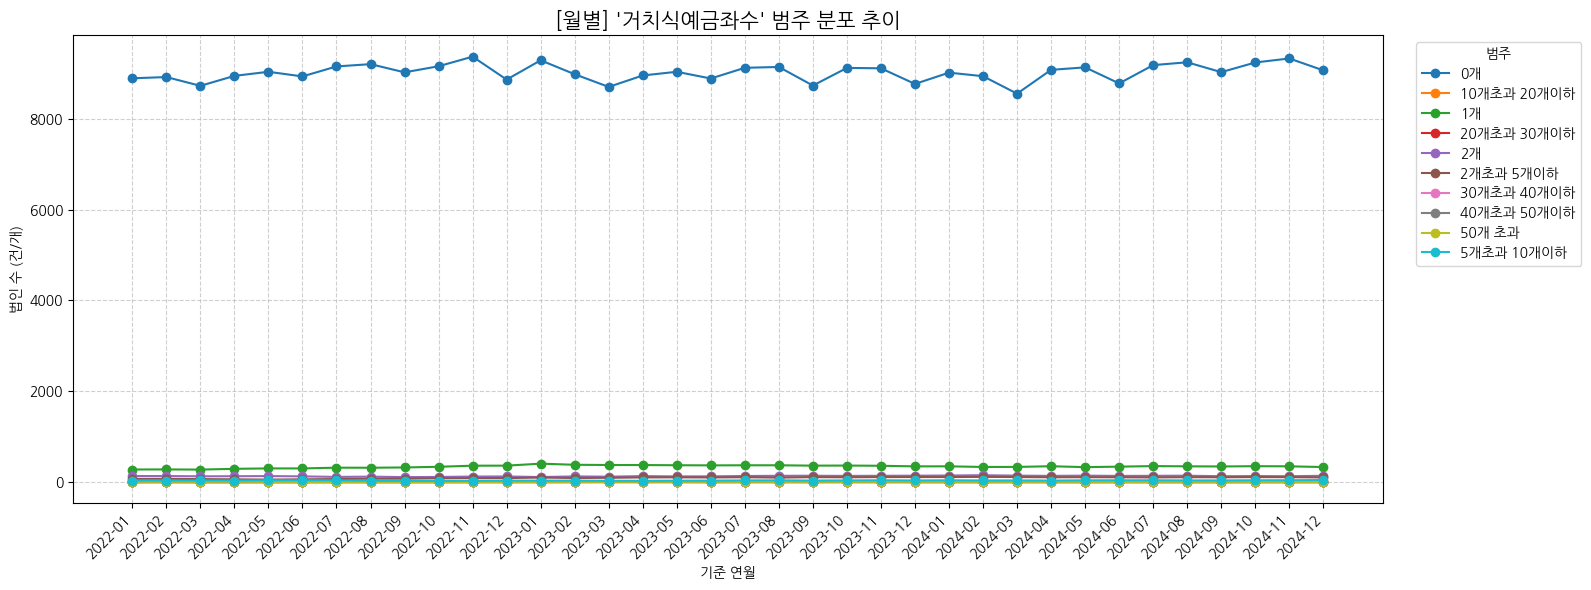

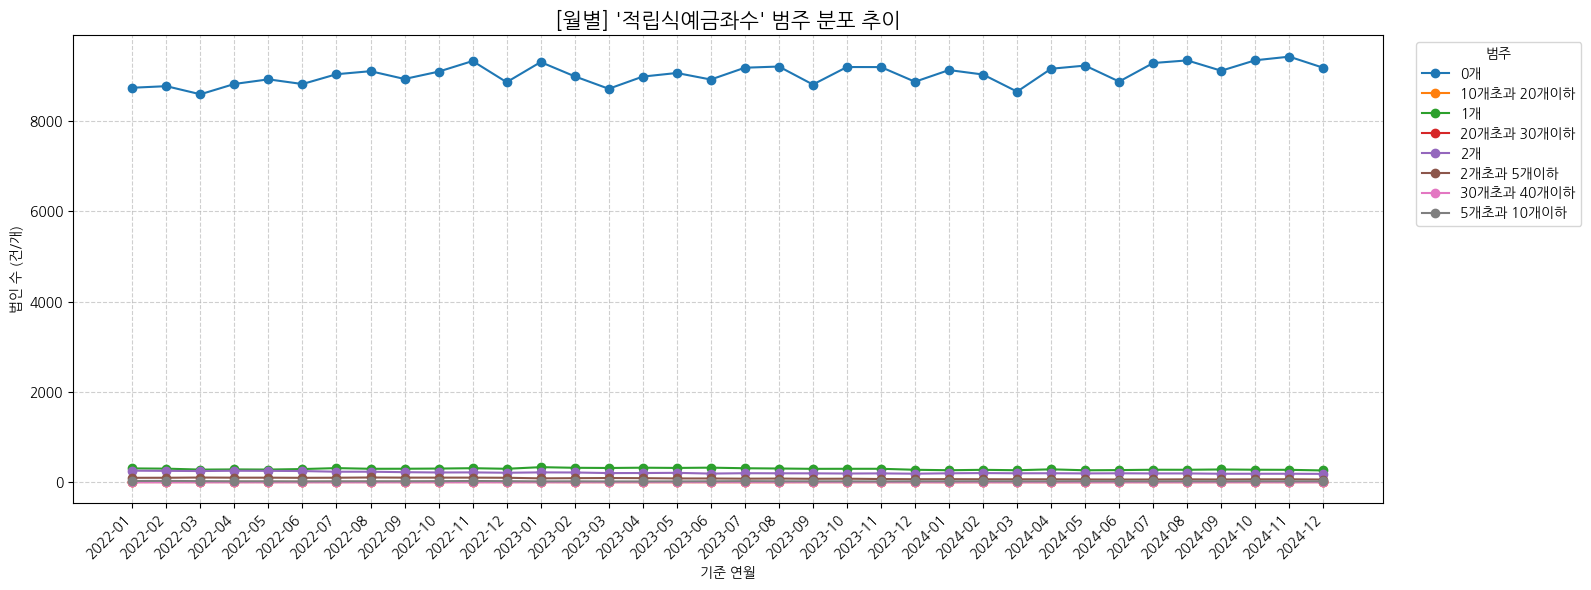

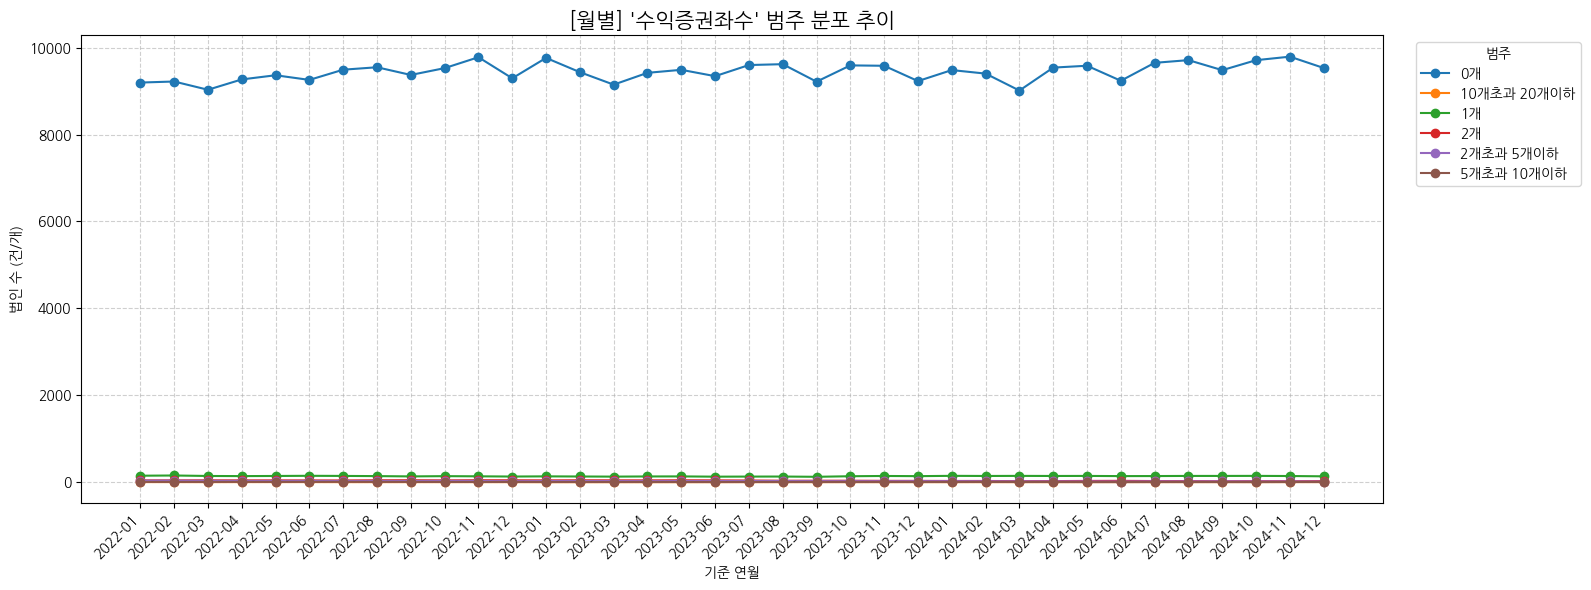

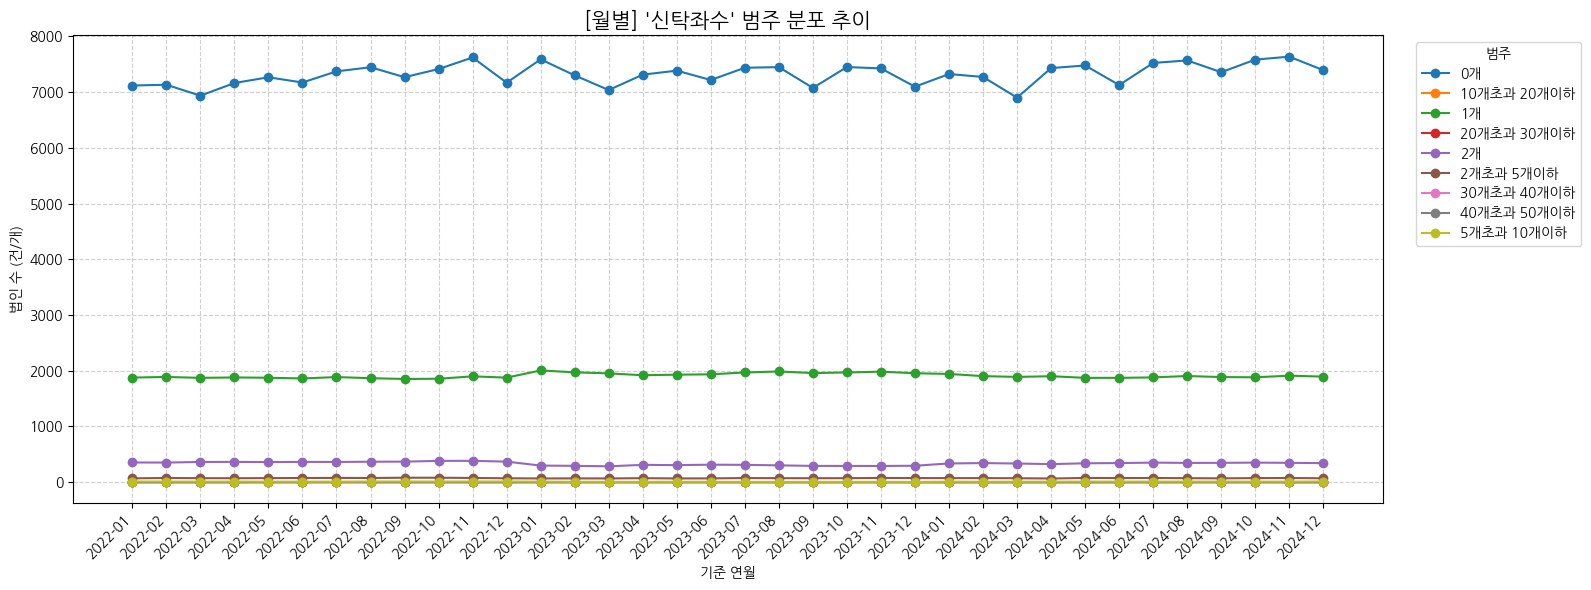

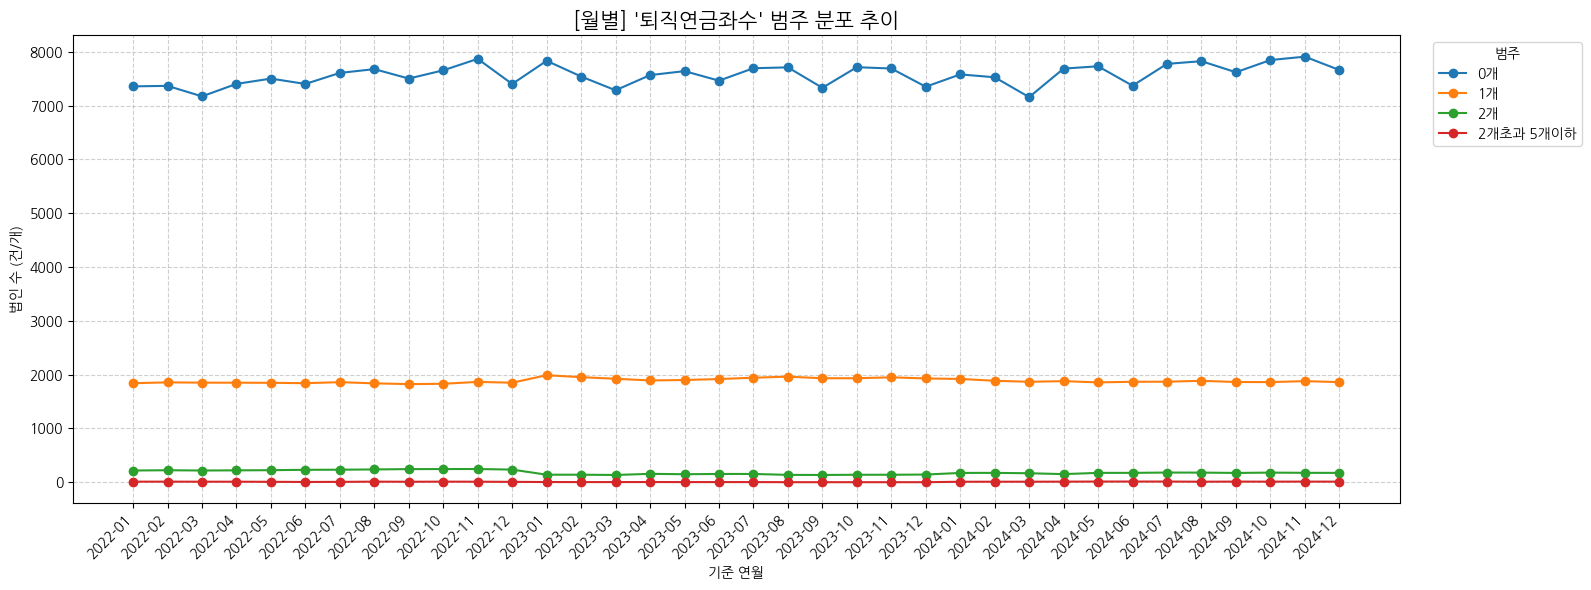

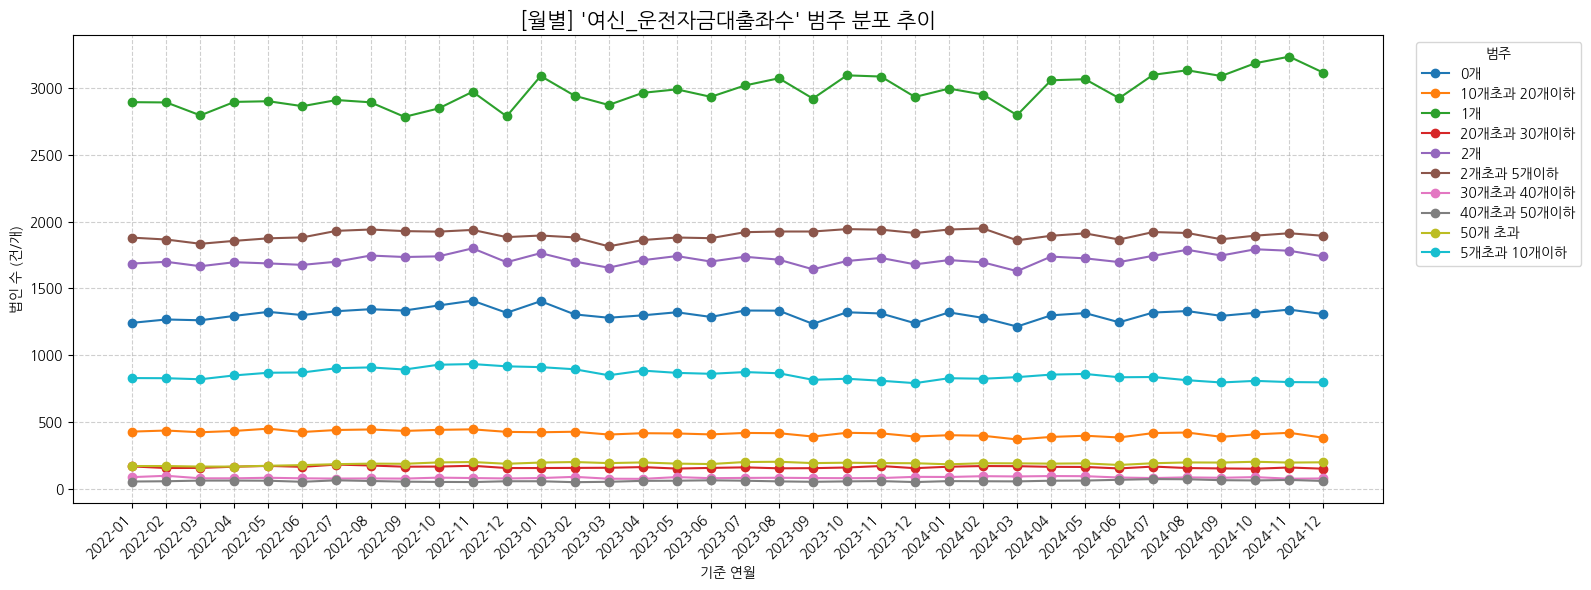

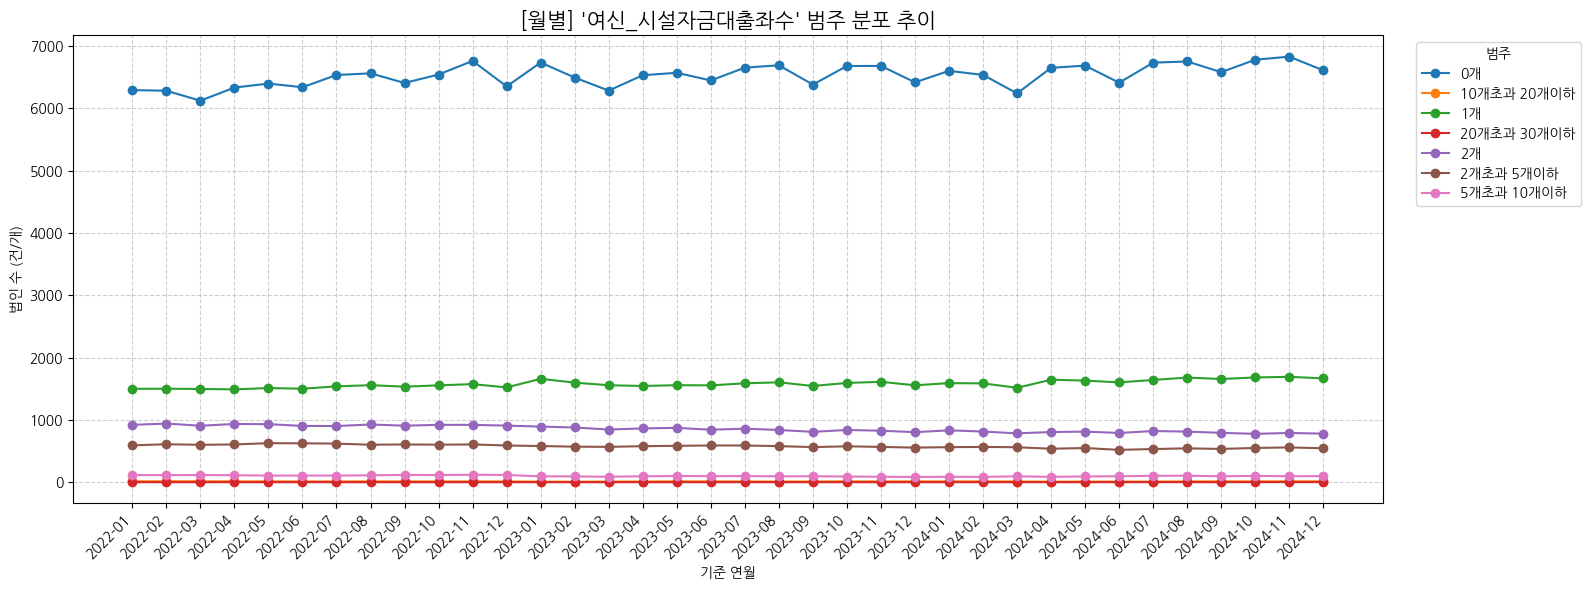

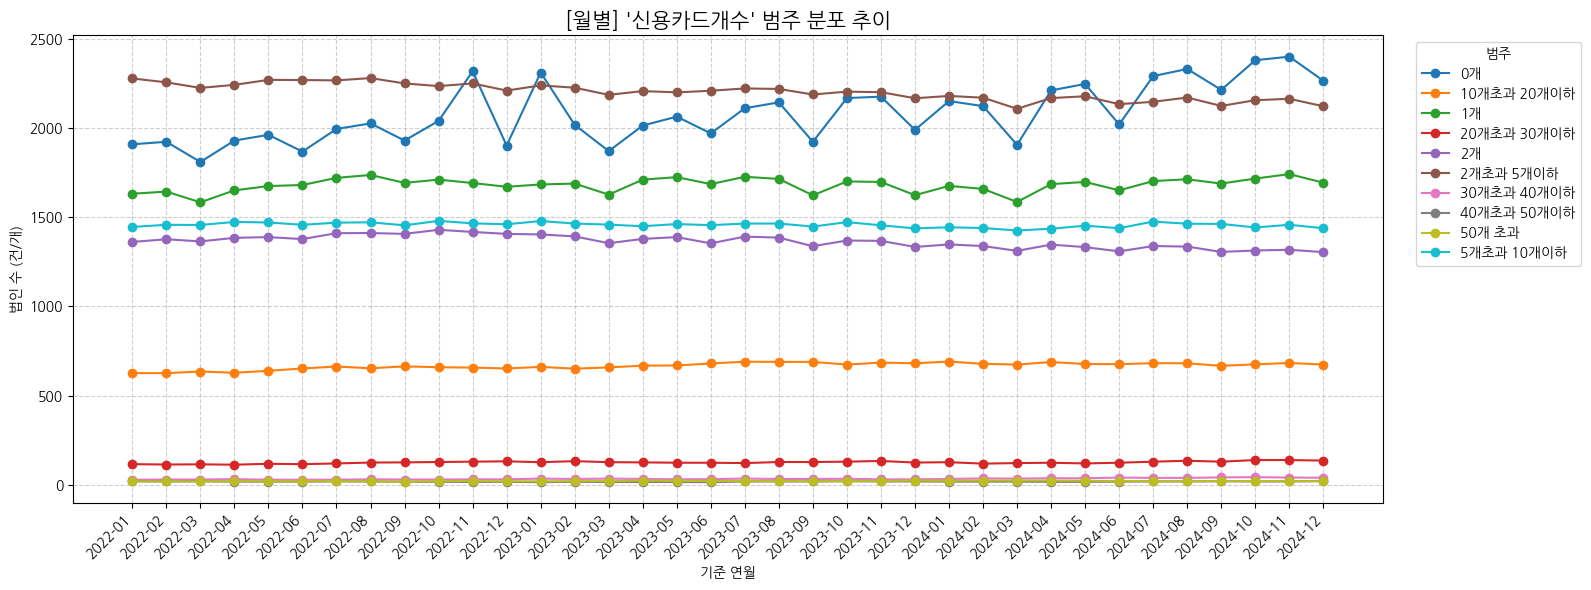

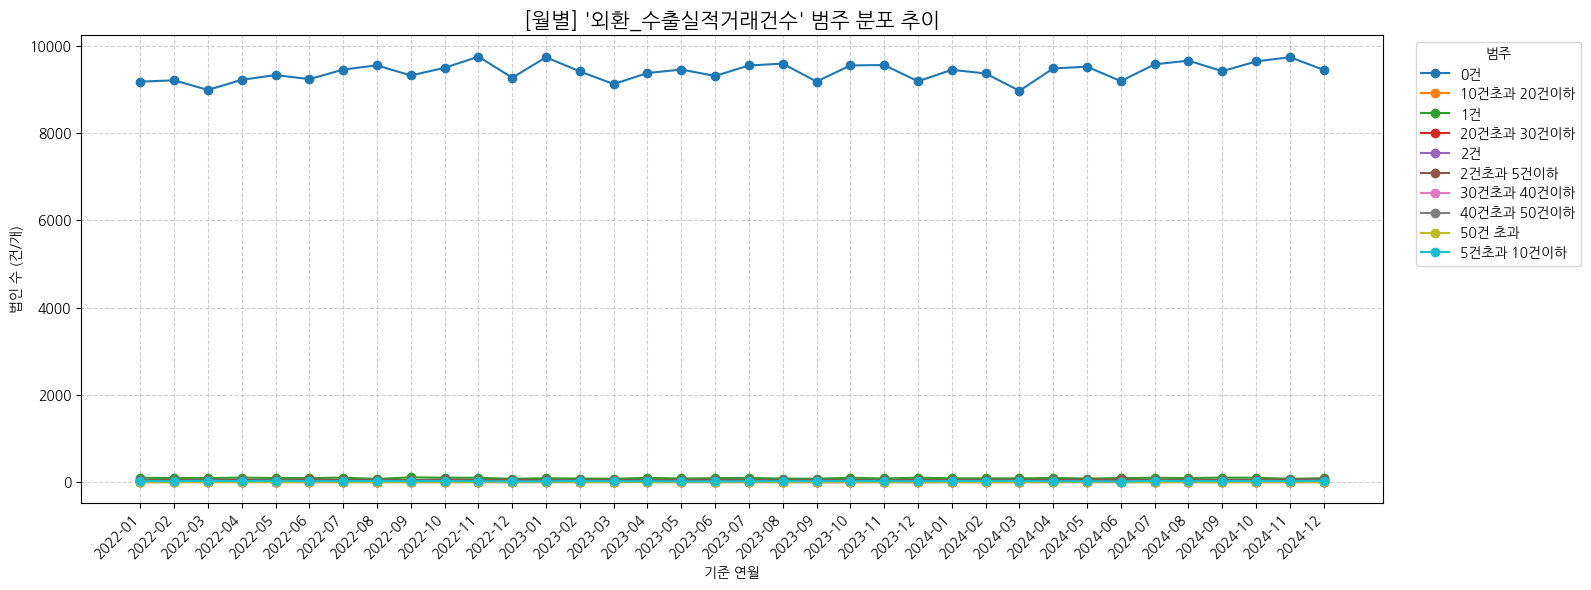

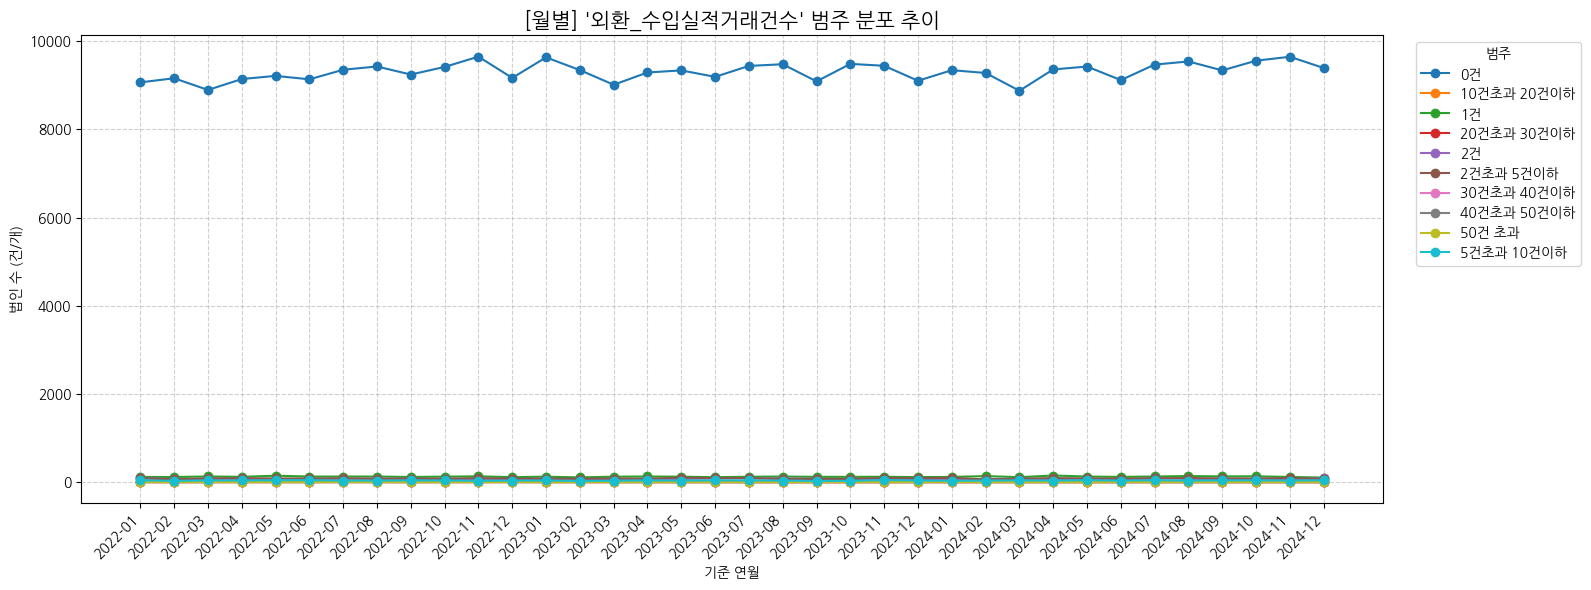

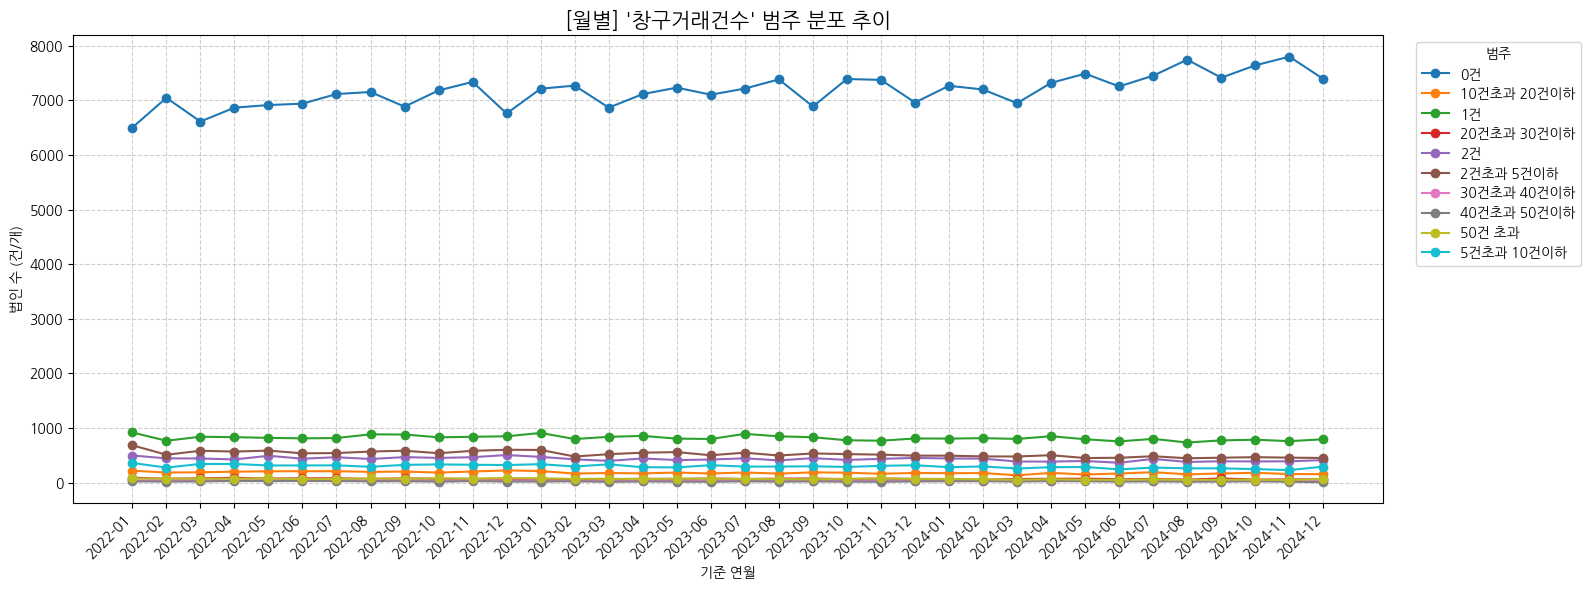

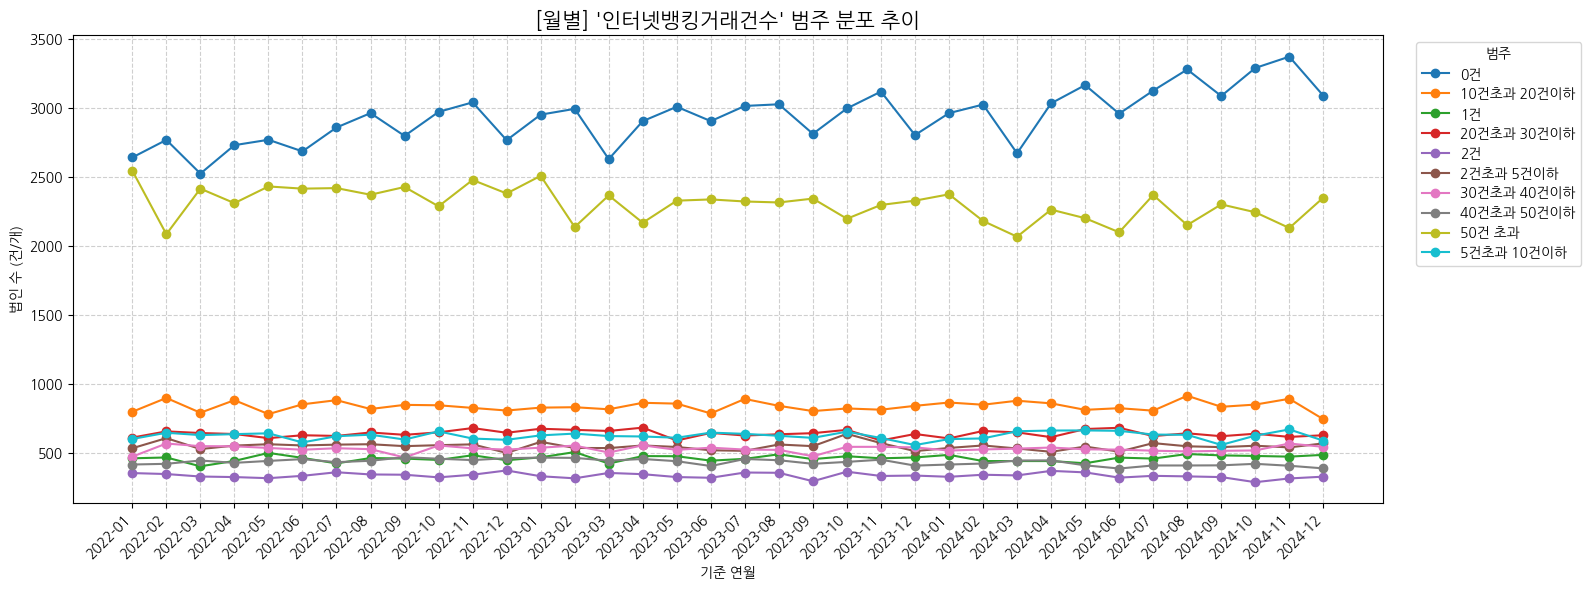

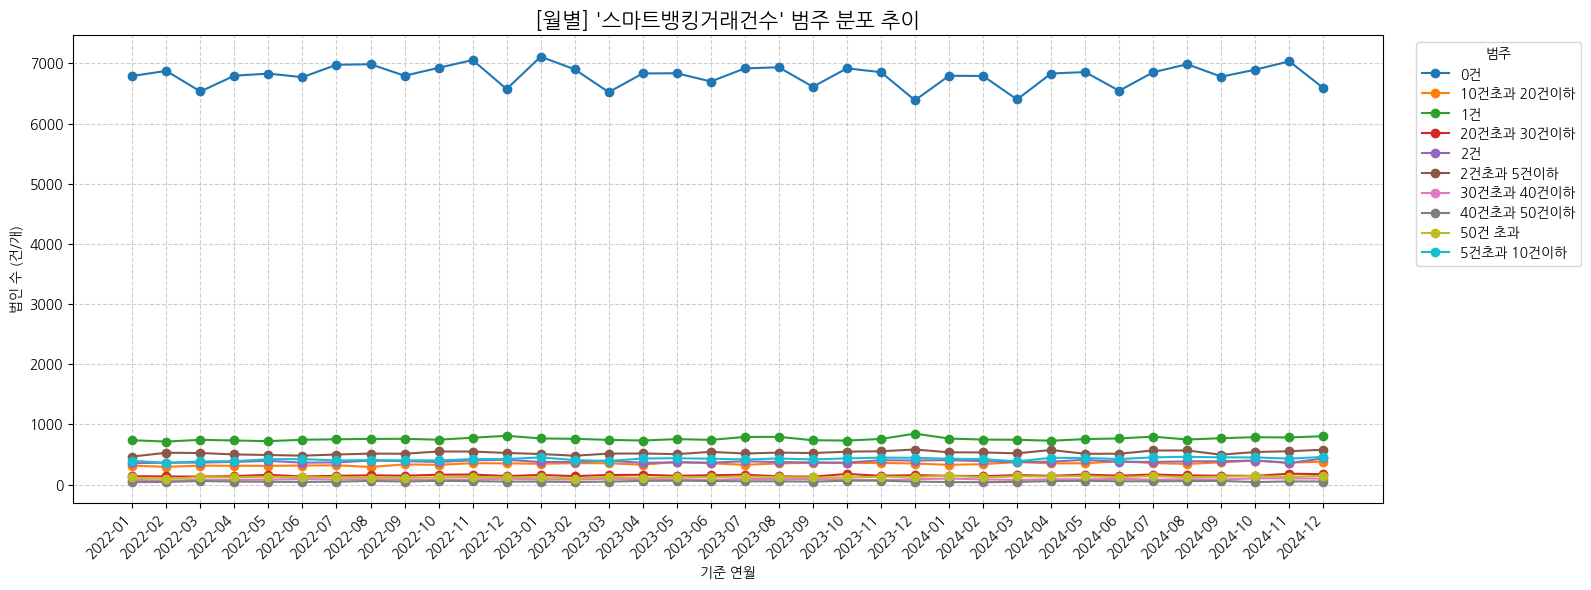

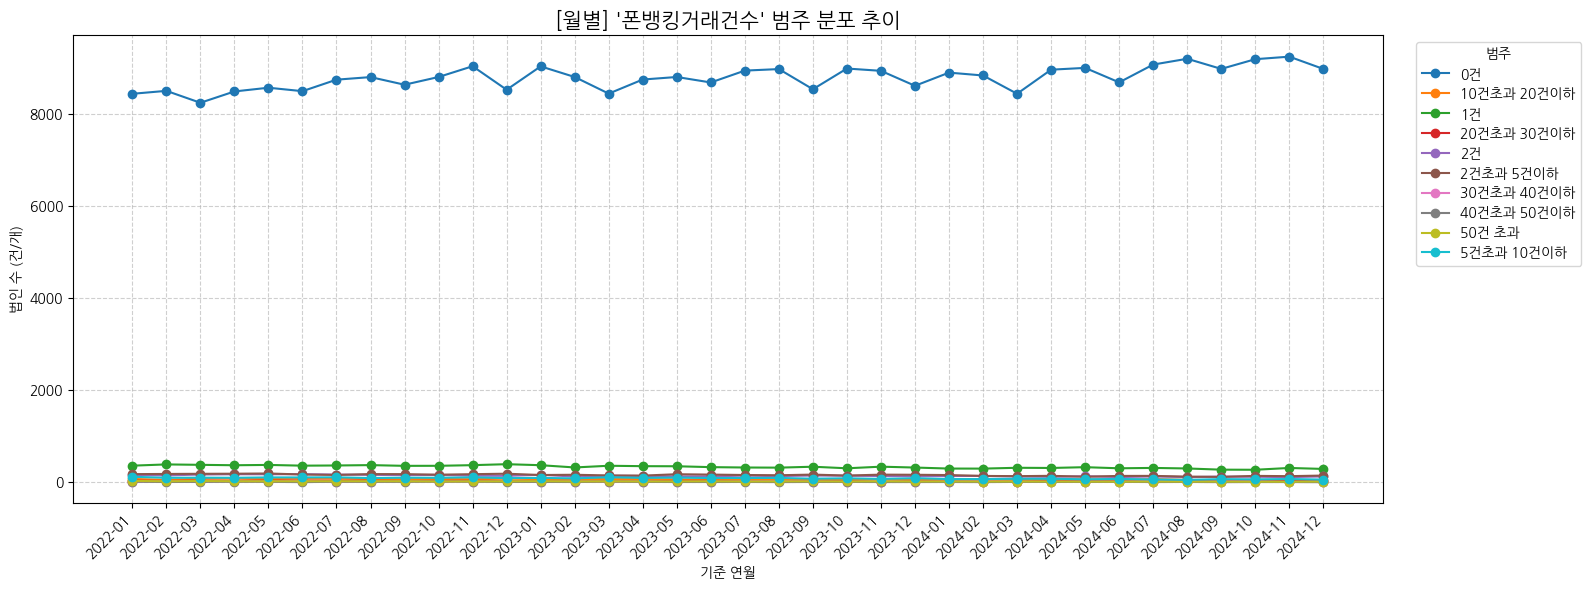

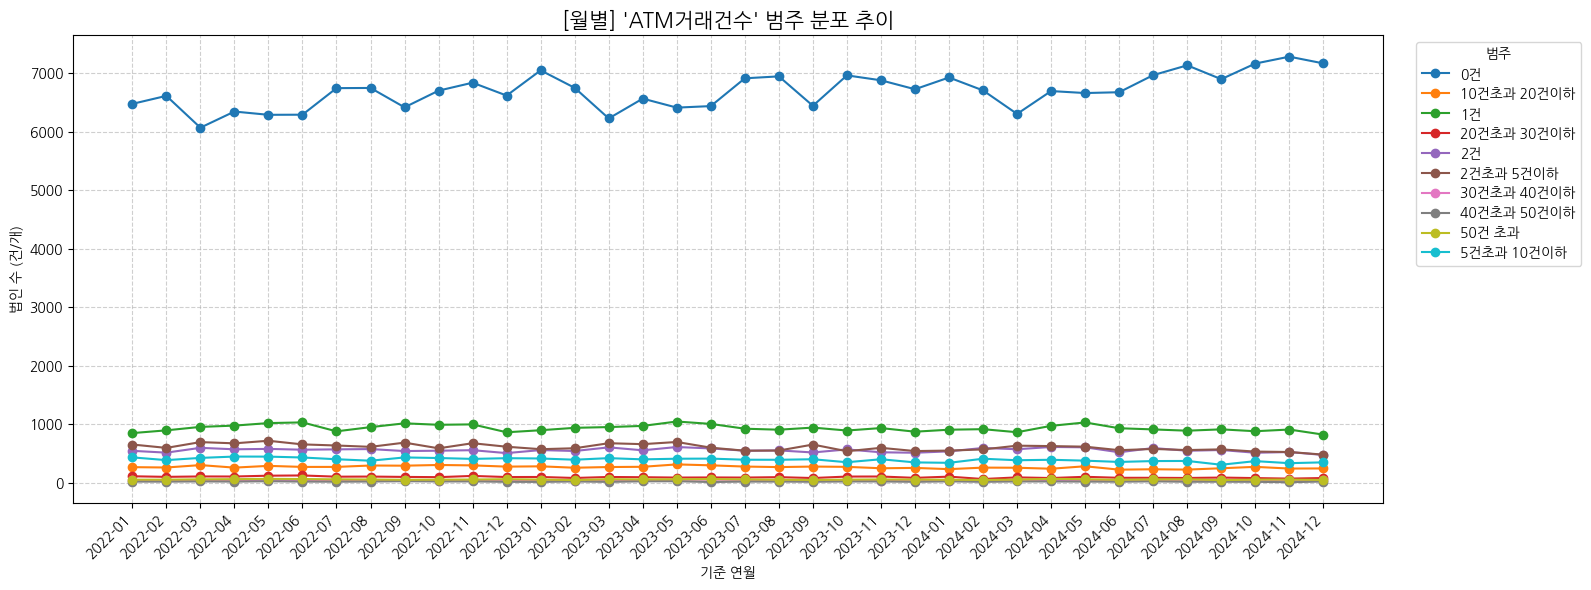

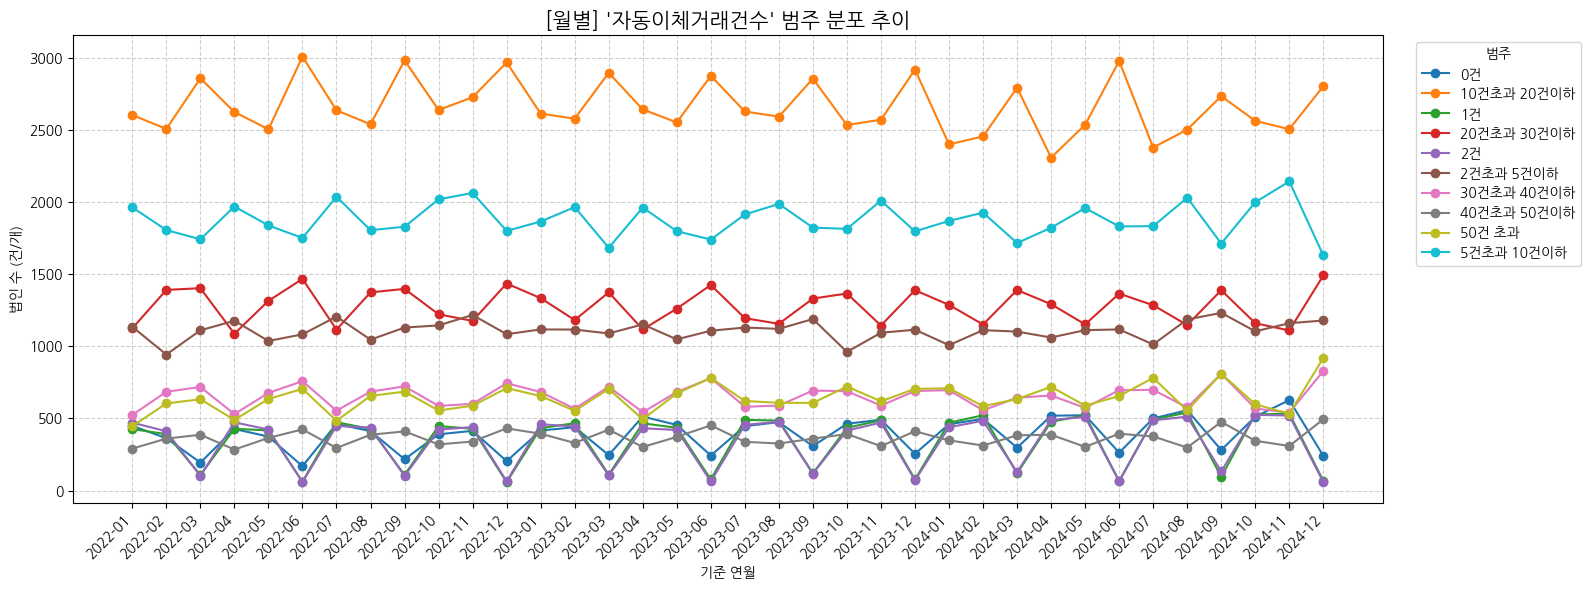

In [9]:
import matplotlib.pyplot as plt

# '년-월' 컬럼 생성
df["연월"] = df["기준년월"].dt.to_period("M").astype(str)

# 좌수 및 거래건수 범주형 변수
count_cols = [
    "요구불예금좌수", "거치식예금좌수", "적립식예금좌수", "수익증권좌수", "신탁좌수", "퇴직연금좌수",
    "여신_운전자금대출좌수", "여신_시설자금대출좌수", "신용카드개수",
    "외환_수출실적거래건수", "외환_수입실적거래건수", "창구거래건수", "인터넷뱅킹거래건수",
    "스마트뱅킹거래건수", "폰뱅킹거래건수", "ATM거래건수", "자동이체거래건수"
]

# 범주형 변수들에 대해 연월별 빈도수 (값별 count)를 구함
category_summary = {}
for col in count_cols:
    category_summary[col] = df.groupby(["연월", col]).size().unstack(fill_value=0)

# 시각화: 각 항목별로 연-월 기준 선 그래프
for col, summary in category_summary.items():
    plt.figure(figsize=(16, 6))

    for cat in summary.columns:
        plt.plot(summary.index, summary[cat], marker='o', label=str(cat))

    plt.title(f"[월별] '{col}' 범주 분포 추이", fontsize=15)
    plt.xlabel("기준 연월")
    plt.ylabel("법인 수 (건/개)")
    plt.xticks(rotation=45, ha="right")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(title="범주", bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

1. 자산/부채 관련 흐름 파악 변수   
요구불예금잔액, 거치식예금잔액, 적립식예금잔액	:	단기/중기/장기 예금 잔액 추이는 자금 유동성 및 경기 불확실성 반영   
수익증권잔액, 신탁잔액, 퇴직연금잔액	:	투자 성향 변화, 자산관리 수요 반영   
여신한도금액, 여신_운전자금대출잔액, 여신_시설자금대출잔액	:	기업의 신용수요 및 자금조달 수요 변화 파악 가능 (경기 선행지표적 역할)   

<Figure size 1600x1000 with 0 Axes>

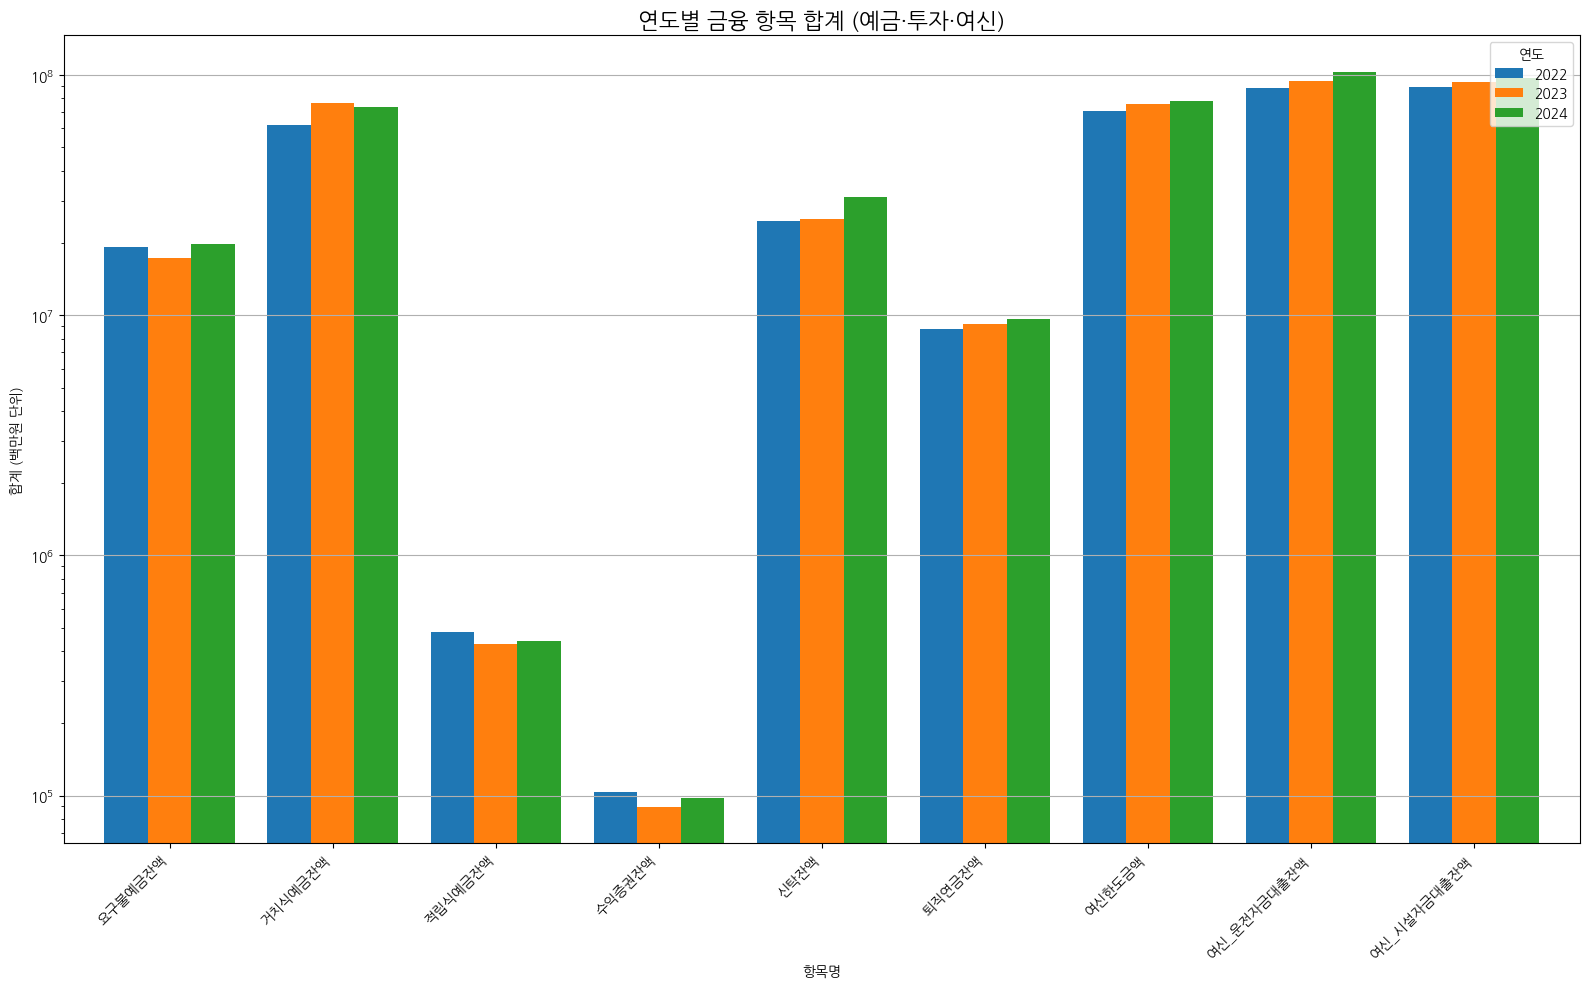

In [15]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 1. 기준년월에서 연도와 월 추출
df["연도"] = df["기준년월"].dt.year
df["월"] = df["기준년월"].dt.month

# 2. 주요 금융 자산/여신 항목 리스트
target_cols = [
    "요구불예금잔액", "거치식예금잔액", "적립식예금잔액",
    "수익증권잔액", "신탁잔액", "퇴직연금잔액",
    "여신한도금액", "여신_운전자금대출잔액", "여신_시설자금대출잔액"
]

# 3. 연도별 합계 계산
yearly_sum = df.groupby("연도")[target_cols].sum().T

# 4. 시각화
plt.figure(figsize=(16, 10))
yearly_sum.plot(kind="bar", figsize=(16, 10), width=0.8)

plt.title("연도별 금융 항목 합계 (예금·투자·여신)", fontsize=16)
plt.xlabel("항목명")
plt.ylabel("합계 (백만원 단위)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.yscale("log")  # 금액 단위가 클 경우 로그스케일 유용
plt.legend(title="연도", loc="upper right")
plt.tight_layout()
plt.show()

2. 대외경제활동 관련 변수   
외환_수출실적금액, 외환_수입실적금액	:	글로벌 공급망, 수출입 경기 흐름 반영

<Figure size 1200x800 with 0 Axes>

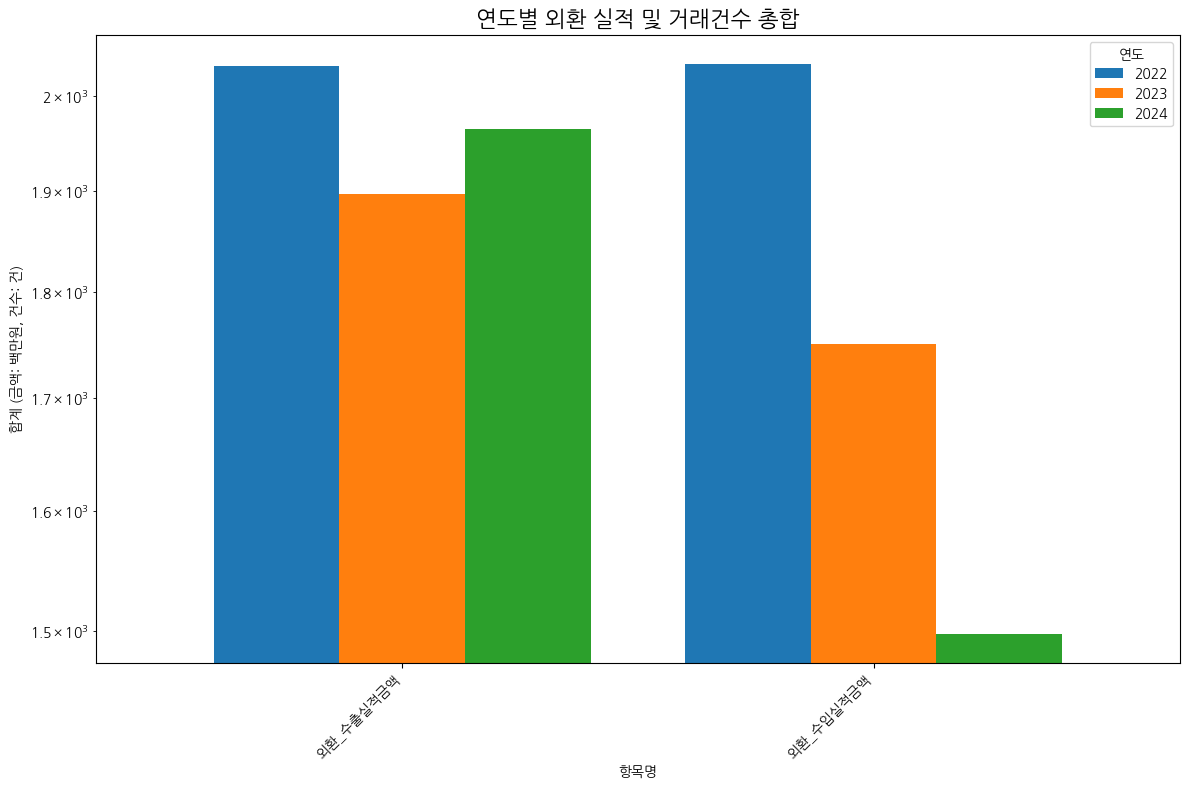

In [20]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 1. 연도 및 월 추출 (이미 처리되어 있다면 생략 가능)
df["연도"] = df["기준년월"].dt.year
df["월"] = df["기준년월"].dt.month

# 2. 외환 관련 항목 리스트
forex_cols = [
    "외환_수출실적금액", "외환_수입실적금액"
]

# 3. 연도별 합계 계산
yearly_forex = df.groupby("연도")[forex_cols].sum().T

# 4. 시각화
plt.figure(figsize=(12, 8))
yearly_forex.plot(kind="bar", figsize=(12, 8), width=0.8)

plt.title("연도별 외환 실적 및 거래건수 총합", fontsize=16)
plt.xlabel("항목명")
plt.ylabel("합계 (금액: 백만원, 건수: 건)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.yscale("log")  # 값 차이가 클 경우 로그스케일 사용
plt.legend(title="연도", loc="upper right")
plt.tight_layout()
plt.show()

2. 대외경제활동 관련 변수   
외환_수출실적거래건수, 외환_수입실적거래건수	:	건수 기반으로 중소기업 등 거래 빈도 확인 가능

<Figure size 1200x600 with 0 Axes>

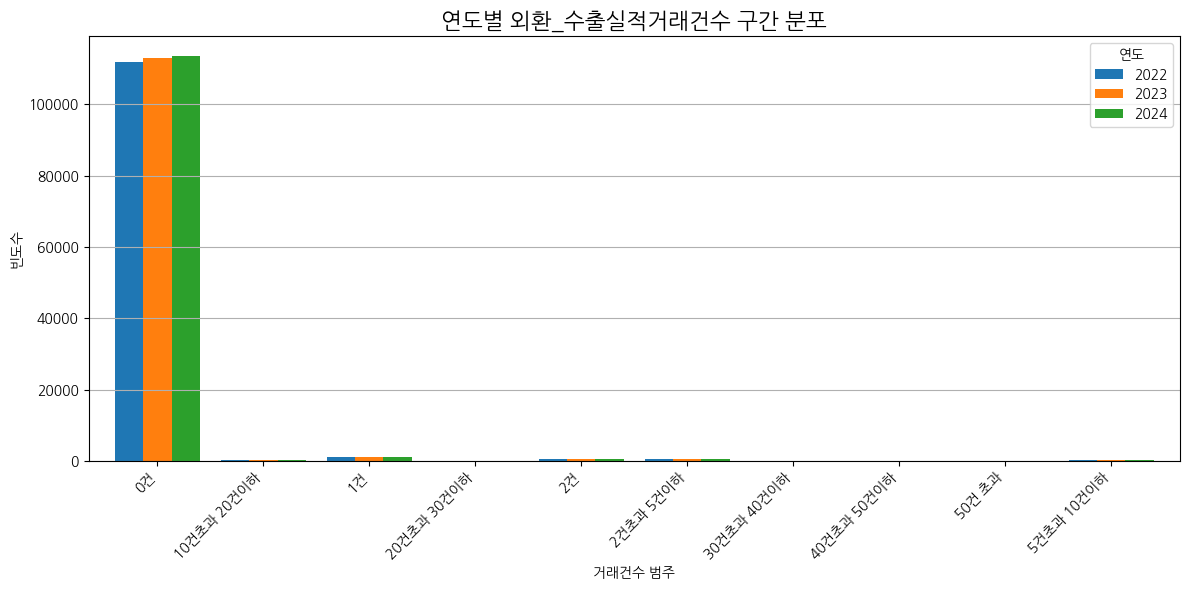

<Figure size 1200x600 with 0 Axes>

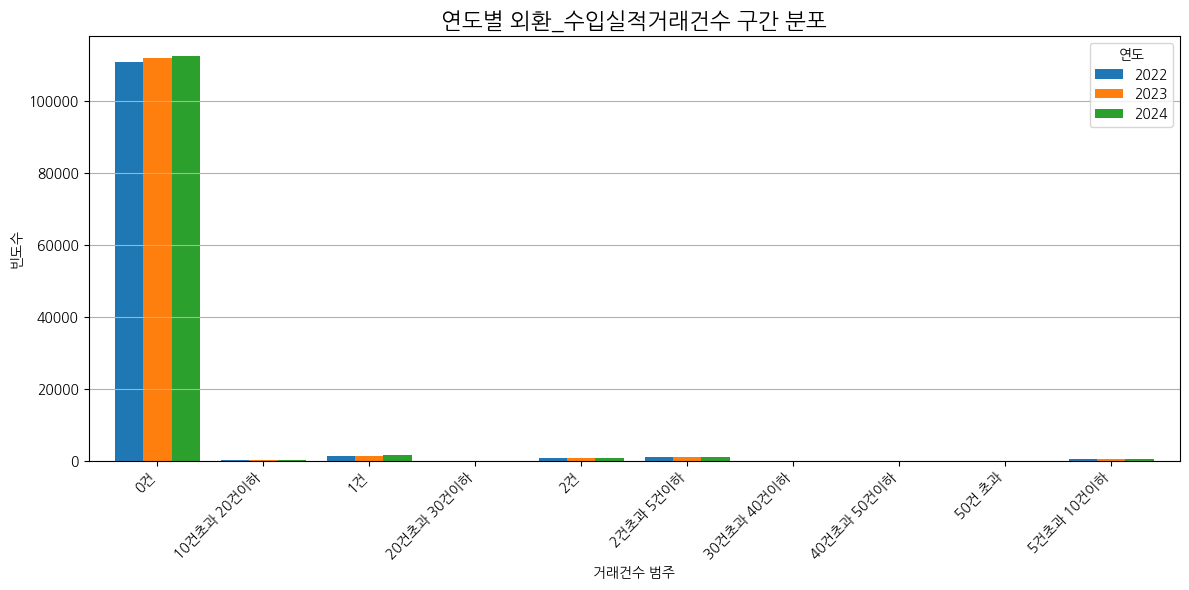

In [21]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 연도 및 월 컬럼 생성 (이미 있다면 생략 가능)
df["연도"] = df["기준년월"].dt.year
df["월"] = df["기준년월"].dt.month

# 분석할 변수들
category_cols = ["외환_수출실적거래건수", "외환_수입실적거래건수"]

# 시각화
for col in category_cols:
    plt.figure(figsize=(12, 6))
    
    # 연도별 범주 빈도 테이블
    count_by_year = df.groupby(["연도", col]).size().unstack(fill_value=0)

    # 그래프
    count_by_year.T.plot(kind="bar", figsize=(12, 6), width=0.8)
    plt.title(f"연도별 {col} 구간 분포", fontsize=16)
    plt.xlabel("거래건수 범주")
    plt.ylabel("빈도수")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y")
    plt.legend(title="연도", loc="upper right")
    plt.tight_layout()
    plt.show()


<Figure size 1200x600 with 0 Axes>

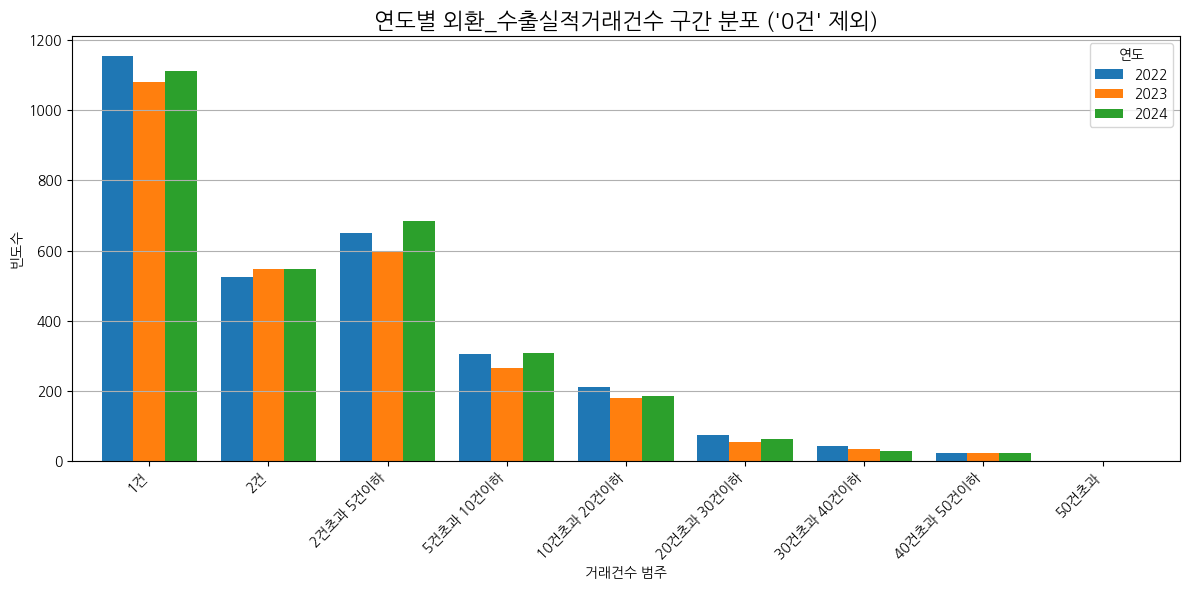

<Figure size 1200x600 with 0 Axes>

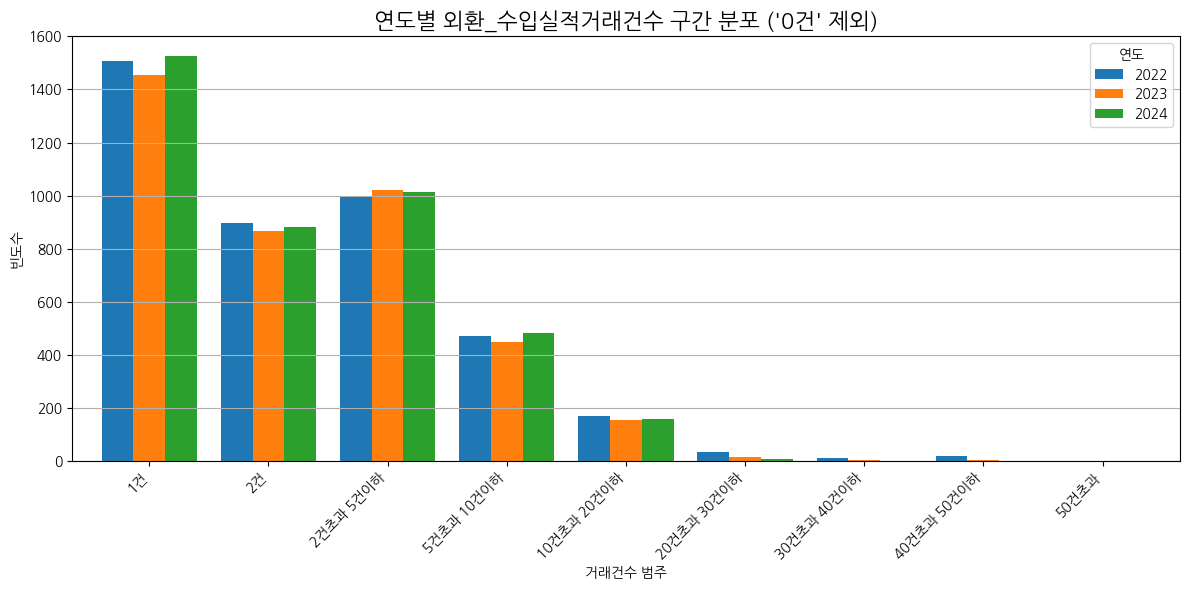

In [25]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pandas as pd

# 연도 및 월 컬럼 생성 (이미 있다면 생략 가능)
df["연도"] = df["기준년월"].dt.year
df["월"] = df["기준년월"].dt.month

# 분석할 변수들
category_cols = ["외환_수출실적거래건수", "외환_수입실적거래건수"]

# 원하는 순서 정의 (0건, 1건 제외)
desired_order = [
    "1건", "2건", "2건초과 5건이하", "5건초과 10건이하",
    "10건초과 20건이하", "20건초과 30건이하",
    "30건초과 40건이하", "40건초과 50건이하", "50건초과"
]

# 시각화
for col in category_cols:
    plt.figure(figsize=(12, 6))
    
    # 0건, 1건 제외
    filtered_df = df[df[col] != "0건"].copy()

    # 카테고리 순서 지정
    filtered_df[col] = pd.Categorical(filtered_df[col], categories=desired_order, ordered=True)

    # 연도별 범주 빈도 테이블
    count_by_year = filtered_df.groupby(["연도", col]).size().unstack(fill_value=0)

    # 정렬 순서 유지
    count_by_year = count_by_year[desired_order]

    # 그래프
    count_by_year.T.plot(kind="bar", figsize=(12, 6), width=0.8)
    plt.title(f"연도별 {col} 구간 분포 ('0건' 제외)", fontsize=16)
    plt.xlabel("거래건수 범주")
    plt.ylabel("빈도수")
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis="y")
    plt.legend(title="연도", loc="upper right")
    plt.tight_layout()
    plt.show()

3. 소비/결제 흐름 관련 변수   
신용카드사용금액, 체크카드사용금액	:	경기민감 소비지표로 활용 가능   
창구거래금액, 인터넷뱅킹거래금액, 스마트뱅킹거래금액, 폰뱅킹거래금액, ATM거래금액, 자동이체금액	:	디지털 전환 흐름 및 소비 채널의 변화 감지 가능   
요구불입금금액, 요구불출금금액	:	기업의 자금 유입/유출 흐름 파악 가능 (경기 활성도 판단 지표로 활용 가능)   

<Figure size 1200x800 with 0 Axes>

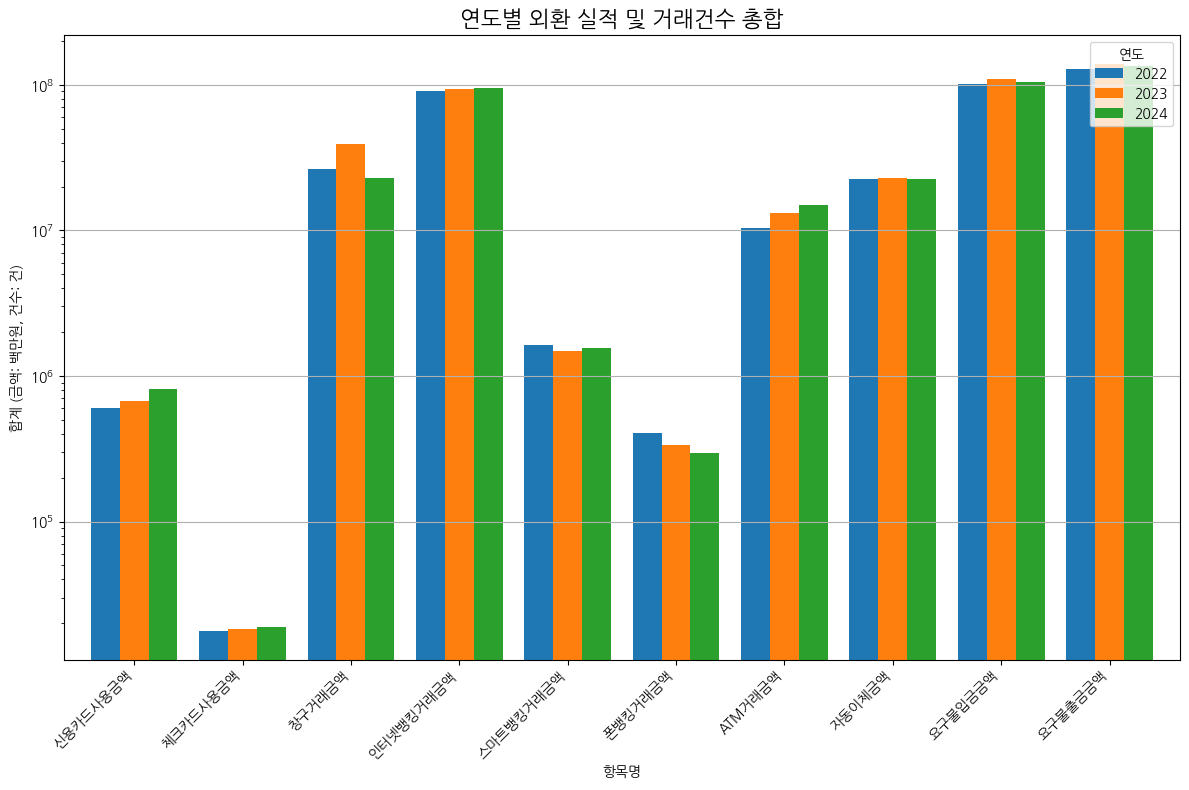

In [22]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

# 1. 연도 및 월 추출 (이미 처리되어 있다면 생략 가능)
df["연도"] = df["기준년월"].dt.year
df["월"] = df["기준년월"].dt.month

# 2. 외환 관련 항목 리스트
forex_cols = [
    "신용카드사용금액", "체크카드사용금액",
    "창구거래금액", "인터넷뱅킹거래금액", "스마트뱅킹거래금액", "폰뱅킹거래금액", "ATM거래금액", "자동이체금액",
    "요구불입금금액", "요구불출금금액"
]

# 3. 연도별 합계 계산
yearly_forex = df.groupby("연도")[forex_cols].sum().T

# 4. 시각화
plt.figure(figsize=(12, 8))
yearly_forex.plot(kind="bar", figsize=(12, 8), width=0.8)

plt.title("연도별 외환 실적 및 거래건수 총합", fontsize=16)
plt.xlabel("항목명")
plt.ylabel("합계 (금액: 백만원, 건수: 건)")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.yscale("log")  # 값 차이가 클 경우 로그스케일 사용
plt.legend(title="연도", loc="upper right")
plt.tight_layout()
plt.show()